In [11]:
import pandas as pd
from utils import *
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier


In [12]:
PATH_TRAIN = "../processed_data/cleaned_data/clean_data.csv"
PATH_TEST = "../processed_data/cleaned_data/clean_test_data.csv"

train_df = pd.read_csv(PATH_TRAIN)
test_df = pd.read_csv(PATH_TEST)

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Train data shape: (13056, 91)
Test data shape: (3091, 91)


In [13]:
X_train = train_df.drop(["Participant_ID", "Depression"], axis=1)
y_train = train_df[["Participant_ID", "Depression", "Gender"]]

X_test = test_df.drop(["Participant_ID", "Depression"], axis=1)
y_test = test_df[["Participant_ID", "Depression", "Gender"]]

In [14]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [15]:
model = lr = LogisticRegression(C=1/1000, solver='liblinear', max_iter=500)
                                #class_weight=calculate_class_weights(y_train, "Depression"))
model.fit(X_train_scaled,y_train["Gender"])
predicted = model.predict(X_test_scaled)
y_test["Gender_predicted"] = predicted

/var/folders/6m/wg76ryq57fnb356nt5xwlbl80000gn/T/ipykernel_36134/3058922730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Gender_predicted"] = predicted


Accuracy: 1.0
Balanced Accuracy: 1.0


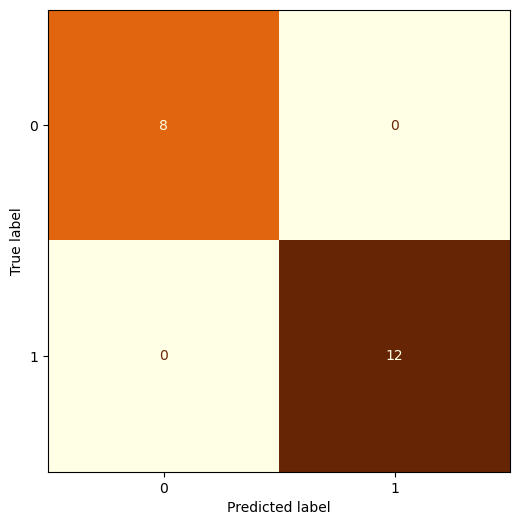

In [16]:
acc, bal_acc = compute_metrics(y_test)

print(f"Accuracy: {acc}")
print(f"Balanced Accuracy: {bal_acc}")

show_conf_matrix(y_test)